## In this section i will show you How to build a ANN project

"So don't waste the time lets get's started"

Load data set

In [ ]:
import tensorflow as tf

# Load the MNIST dataset directly from TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {train_images.shape}, {train_labels.shape}")
print(f"Testing data shape: {test_images.shape}, {test_labels.shape}")


Training data shape: (60000, 28, 28), (60000,)
Testing data shape: (10000, 28, 28), (10000,)


## Understand the dataset

Traning data = 60000 and 20*20 pixel.
Testing data images = 10000 grayscale and size 20*20 pixel
label = 10000

## Data preprocessing

Normalization

Science pixel values range from 0 to 255, we will normalize them to 0 to 1 by deviding by 255

In [ ]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Normalizing the pixel values (0-1 range)
train_images = train_images / 255.0
test_images = test_images / 255.0

#Reshaping

In [ ]:
# Reshaping the images to a flat vector of 784 features
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)

#One hot encoding

In [ ]:
# One-hot encoding the labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

## Dislaying a few simple images with labels

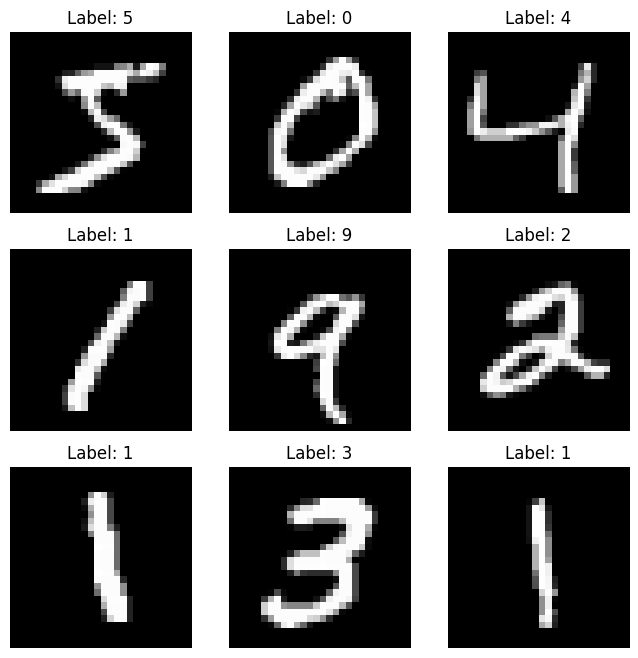

In [ ]:
# Displaying a few sample images with labels
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {tf.argmax(train_labels[i])}")
    plt.axis('off')
plt.show()

## Building the ANN model

We will build a simple ANN model with the folling structure

Inputlayer = Flattened 784 neurons
Hiddenlayer = Dense layer with Relu activation
Dense layer = Dense layer with softmax activation 10 neurons 10 classes

##Coding for building ANN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Hidden layer
    Dense(64, activation='relu'),                        # Hidden layer
    Dense(10, activation='softmax')                      # Output layer
])

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

##Traning the ANN model


Code for traning model

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8753 - loss: 0.4264 - val_accuracy: 0.9673 - val_loss: 0.1108
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9688 - loss: 0.1037 - val_accuracy: 0.9706 - val_loss: 0.0965
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9782 - loss: 0.0705 - val_accuracy: 0.9736 - val_loss: 0.0810
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9837 - loss: 0.0504 - val_accuracy: 0.9764 - val_loss: 0.0800
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9781 - val_loss: 0.0734
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9903 - loss: 0.0303 - val_accuracy: 0.9793 - val_loss: 0.0735
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9912 - loss: 0.0260 - val_accuracy: 0.9731 - val_loss: 0.0995
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9937 - loss: 0.019

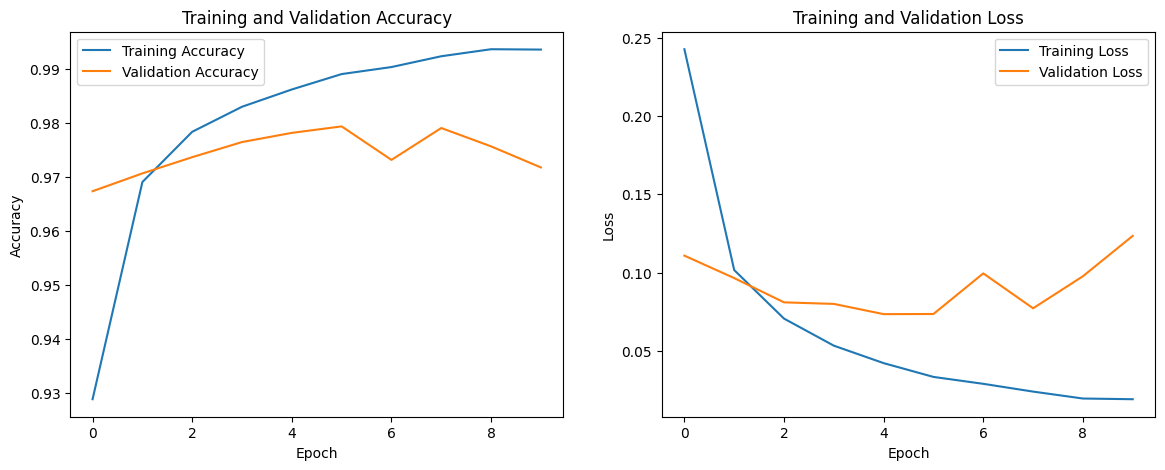

In [ ]:
# Training the ANN model
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=10,
                    batch_size=32)

# Plotting training and validation accuracy and loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Model evoluate and testing

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9678 - loss: 0.1405

Test Accuracy: 0.9717
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.92      0.99      0.95      1010
           4       0.99      0.96      0.98       982
           5       1.00      0.94      0.97       892
           6       0.97      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.92      0.99      0.95       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



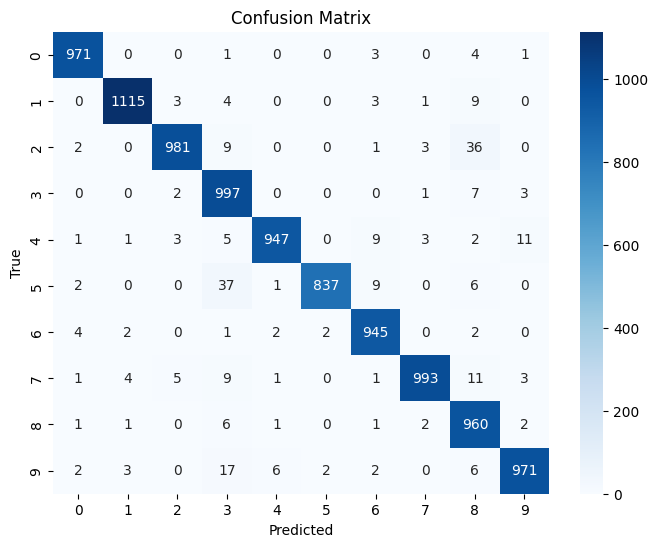

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Model evaluation on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predicting the test set results
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Save the model in HDF5 format
model.save("mnist_ann_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mnist_ann_model.h5")
print("Model loaded successfully!")


Model loaded successfully!
